<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fabián Castro`


In [1]:
import os
import re
import json
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score, \
    precision_score, recall_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 20)
stopwords_es = stopwords.words('spanish')

In [2]:
DATASETS_PATH = '../datasets'
FILE_NAME = 'reviews_vidjew_es.csv'

In [3]:
# Cargar datos
data = pd.read_csv(os.path.join(DATASETS_PATH, FILE_NAME), sep = ',', header = 0, engine = 'c') 
data.sample(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
954,es_0973308,product_es_0864548,reviewer_es_0537487,2,"Lo que buscaba a un precio mas que reducido. De lo que me tengo que quejar y con razón es del transporte. A parte de que la caja venía con serios rasguños, las cajas de los juegos que estaban dent...","Consola bien, transporte para devolver el producto",es,video_games
212,es_0667995,product_es_0126676,reviewer_es_0155860,3,La imaginaba más grande. Pero a pesar del tamaño es preciosa.,Tamaño,es,jewelry
356,es_0213081,product_es_0924716,reviewer_es_0351127,5,"Muy orgullosos con esta compra, se ve de alta calidad,nada que envidiar a una joyería. Un regalo precioso que aguanta dl color perfectamente","Muy bonito, de alta calidad",es,jewelry
192,es_0055232,product_es_0222599,reviewer_es_0000351,3,Calidad de la piel es real pero el cierre magnético falla enseguida y es fácil perderla. Envoltorio muy bueno,Calidad buena y mal cierre,es,jewelry
43,es_0263531,product_es_0958535,reviewer_es_0758446,1,Sacacuartos de una edición que no es ni especial ni nada. Calidad y detalles bastante mediocres.,Son 4 pins normales,es,video_games


In [4]:
print(f'El archivo cuenta con {data.shape[0]} observaciones y {data.shape[1]} columnas')

El archivo cuenta con 1000 observaciones y 8 columnas


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [5]:
data_train, data_test = train_test_split(data, test_size = .2, random_state = 42)

In [6]:
print(f'El conjunto de entrenamiento cuenta con {data_train.shape[0]} observaciones')
print(f'El conjunto de prueba cuenta con {data_test.shape[0]} observaciones')

El conjunto de entrenamiento cuenta con 800 observaciones
El conjunto de prueba cuenta con 200 observaciones


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [7]:
def pre_process(text):
    text = text.lower()
    text = re.sub(r'[\W\d_]+',' ',text)
    text = text.split()
    text = [word for word in text if word not in stopwords_es]
    return ' '.join(text)

In [8]:
tfidf_vect = TfidfVectorizer(preprocessor = pre_process)
Xtrain = tfidf_vect.fit_transform(data_train['review_body'].values)
ytrain = data_train['product_category'].values

Xtest = tfidf_vect.transform(data_test['review_body'].values)
ytest = data_test['product_category'].values

In [9]:
pd.DataFrame(Xtrain.toarray(), columns = tfidf_vect.get_feature_names())

,abajo,abalorio,abalorios,abaratar,abate,abierta,abierto,ablar,abre,abren,...,éste,éxito,ópticas,última,últimas,últimos,única,únicamente,único,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

#### Utilizando una red neuronal

<div>
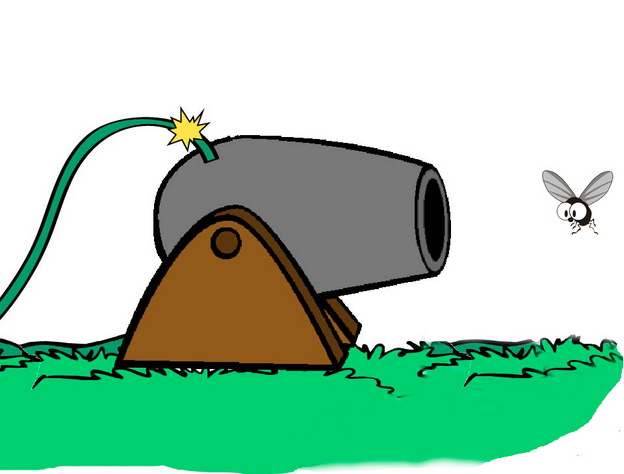
<div>
    
[Fuente](https://comaconcomilla.files.wordpress.com/2015/10/mosca-cancc83onazos.png)

In [10]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-4,
                     hidden_layer_sizes=(80), random_state=42)

clf.fit(Xtrain, ytrain);

In [11]:
yfit = clf.predict(Xtest)

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [12]:
print(f'Exactitud: {accuracy_score(ytest, yfit):.2f}')
print(f'Precisión: {precision_score(ytest, yfit, pos_label = "jewelry"):.2f}')
print(f'Sensibilidad: {recall_score(ytest, yfit, pos_label = "jewelry"):.2f}')
print(f'Medida f1: {f1_score(ytest, yfit, pos_label = "jewelry"):.2f}')

Exactitud: 0.83
Precisión: 0.80
Sensibilidad: 0.88
Medida f1: 0.84


In [13]:
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

     jewelry       0.80      0.88      0.84        97
 video_games       0.87      0.80      0.83       103

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.83       200



###  `[BONUS: 3 pts]` Matriz de confusión

Text(0.5, 1.0, 'Confusion matrix')

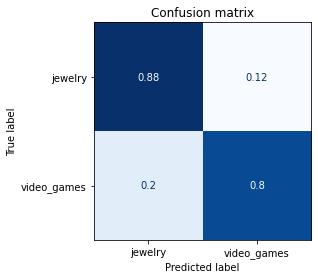

In [14]:
plot_confusion_matrix(clf, Xtest, ytest, cmap = 'Blues', normalize ='true').im_.colorbar.remove()
plt.title('Confusion matrix')

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [15]:
clf.coefs_[0].shape

(3221, 80)

In [16]:
clf.coefs_[1].shape

(80, 1)

In [17]:
coefMean = np.mean(clf.coefs_[0], axis = 1) # promedio de pesos para cada nodo de entrada
vocab = {value:key for key, value, in tfidf_vect.vocabulary_.items()}
termWeights = [(vocab[e[0]], round(e[1], 2)) for e in list(zip(coefMean.argsort() ,
                                                 sorted(coefMean)))]

### Términos más importantes para la categoría "video_games"

In [18]:
termWeights[:5]

[('juego', -0.55),
 ('mando', -0.21),
 ('jugar', -0.15),
 ('ps', -0.14),
 ('solo', -0.14)]

### Términos más importantes para la categoría "jewelry"

In [19]:
termWeights[-5:]

[('pequeño', 0.21),
 ('pulsera', 0.27),
 ('bonitos', 0.27),
 ('foto', 0.28),
 ('bonito', 0.29)]

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

Una de las características de los modelos de redes neuronales es que no suelen ser sencillos de interpretar. Pero basado en la premisa de que un nodo de una capa oculta se activa o no se activa basado en sus entradas, se puede tomar el promedio de los pesos que cada nodo de entrada tiene sobre los nodos de la primera capa oculta (en este caso, la única capa oculta).

Por otro lado, la utilización de redes neuronales (con la configuración actual), no parece rendimiento superior significativo al que otros modelos más simples podrían ofrecer. Se intento con otros parámetros de configuración (o hiperparámetros), con varias capas, distintos números de nodos para cada capa, distinto valor alpha (que está altamente relacionado con el parámetro de regularización) per la métrica f1-score más alta que se obtuvo fue del 85%. (las configuraciones nombradas en el párrafo anterior, fueron simplemente prueba y error, no se utilizó algún criterio en especial para hacer estas pruebas).